<a href="https://colab.research.google.com/github/SathyaSudha-96/Deep-Learning-2021-22/blob/main/IDL_Assignment_10_SathyaSudhaMurugan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification without adversarial attacks

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import random
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from tensorflow.keras.callbacks import LambdaCallback

In [2]:
data = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = data.load_data()

In [3]:
print('Shape of Training Images',train_images.shape)
print('Shape of Training Labels',train_labels.shape)
print('Shape of Testing Images',test_images.shape)
print('Shape of Testing Labels',test_labels.shape)

Shape of Training Images (60000, 28, 28)
Shape of Training Labels (60000,)
Shape of Testing Images (10000, 28, 28)
Shape of Testing Labels (10000,)


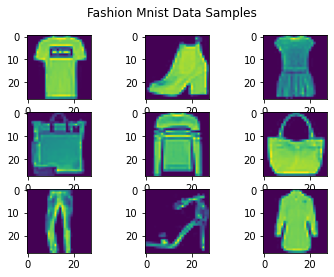

In [4]:
figure, ax = plt.subplots(3,3)
figure.suptitle("Fashion Mnist Data Samples")
ax[0,0].imshow(train_images[1])
ax[0,1].imshow(train_images[800])
ax[0,2].imshow(train_images[3])
ax[1,0].imshow(train_images[408])
ax[1,1].imshow(train_images[5])
ax[1,2].imshow(train_images[100])
ax[2,0].imshow(train_images[7020])
ax[2,1].imshow(train_images[8])
ax[2,2].imshow(train_images[11209])

In [23]:
#Convert the images into grey scale
train_data = tf.data.Dataset.from_tensor_slices(
    (train_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, train_labels.astype(np.int32)))
train_data = train_data.shuffle(buffer_size=60000).batch(128)
test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, test_labels.astype(np.int32)))
test_data = test_data.shuffle(buffer_size=10000).batch(128, drop_remainder=True)

test_images = test_images.reshape([-1, 28, 28, 1]).astype(np.float32) / 255
test_labels = test_labels.astype(np.int32)

In [6]:
def training_Testing_loop(epochs, model,optimizer):
  loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
  train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
  test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
  for epoch in range(epochs):
    print("Starting epoch", epoch+1)
    for step, (image_batch, label_batch) in enumerate(train_data):
      with tf.GradientTape() as tape:
         logits = model(image_batch)
         loss = loss_fn(label_batch, logits)
      #Calculate gradients using gradient tape
      gradients = tape.gradient(loss, model.trainable_variables)
      #Assign new variables to the model using optimizer isntead of sub assign
      optimizer.apply_gradients(zip(gradients, model.trainable_variables))
      #Calculate  traning accuracy
      train_acc_metric(label_batch, logits)
    
      if not step % 100:
        #Calculate test accuracy
        test_acc_metric(test_labels, model(test_images))   
        print("Loss: {} Training Accuracy: {} Testing Accuracy: {}".format(loss, train_acc_metric.result(), test_acc_metric.result()))

In [7]:
model = Sequential([
  layers.Conv2D(16, (3,3), padding='same', activation='relu',input_shape = (28,28,1)),
  layers.MaxPooling2D((2,2),strides=2,padding="same"),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D((2,2),strides=2,padding="same"),
  layers.Flatten(),
  layers.Dense(32, activation='relu'),
  layers.Dense(10)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 32)                5

In [8]:
training_Testing_loop(50, model, optimizer = tf.optimizers.SGD())

Starting epoch 1
Loss: 2.3095240592956543 Training Accuracy: 0.1171875 Testing Accuracy: 0.09799999743700027
Loss: 2.071226119995117 Training Accuracy: 0.22663985192775726 Testing Accuracy: 0.20659999549388885
Loss: 1.154547095298767 Training Accuracy: 0.3397465944290161 Testing Accuracy: 0.3395666778087616
Loss: 0.8071622252464294 Training Accuracy: 0.439109206199646 Testing Accuracy: 0.41554999351501465
Loss: 0.6984835267066956 Training Accuracy: 0.5026301145553589 Testing Accuracy: 0.47214001417160034
Starting epoch 2
Loss: 0.8188636302947998 Training Accuracy: 0.5322479009628296 Testing Accuracy: 0.5121999979019165
Loss: 0.6871200799942017 Training Accuracy: 0.5676146149635315 Testing Accuracy: 0.5456428527832031
Loss: 0.6405497789382935 Training Accuracy: 0.5937966704368591 Testing Accuracy: 0.5718250274658203
Loss: 0.7282446026802063 Training Accuracy: 0.6138356328010559 Testing Accuracy: 0.5925333499908447
Loss: 0.6321561336517334 Training Accuracy: 0.6300301551818848 Testing Ac

In [9]:
model.save('/content/drive/MyDrive/Intro_to_deepLearning/Assignment_9')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Intro_to_deepLearning/Assignment_9/assets


In [4]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Intro_to_deepLearning/Assignment_9')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 32)                5

In [4]:
# Pre-process data
num_classes = 10

x_train = train_images / 255
x_test = test_images / 255

x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

y_train = tf.keras.utils.to_categorical(train_labels, num_classes)
y_test = tf.keras.utils.to_categorical(test_labels, num_classes)

print("Data shapes", x_test.shape, y_test.shape, x_train.shape, y_train.shape)

Data shapes (10000, 28, 28, 1) (10000, 10) (60000, 28, 28, 1) (60000, 10)


# Adverserial Examples

In [5]:
  adverserial_image = []
  adverserial_label = []
  for step, (image_batch, label_batch) in enumerate(train_data):
    loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
    
    with tf.GradientTape() as tape:
      tape.watch(image_batch)
      prediction = new_model(image_batch)
      loss = loss_fn(label_batch, prediction)
    gradients = tape.gradient(loss, image_batch)
    signed_grad = tf.sign(gradients)
    epsilon = 0.1
    for i in range(len(image_batch)):
      adversarial = image_batch[i] + signed_grad[i] * epsilon
      adverserial_image.append(adversarial)
      adverserial_label.append(label_batch[i])

In [10]:
adversarial_image_array = np.array(adverserial_image)
print(adversarial_image_array.shape)
adverserial_label_array = np.array(adverserial_label)
print(adverserial_label_array.shape)

(60000, 28, 28, 1)
(60000,)


In [16]:
print(np.unique(adverserial_label_array))

[0 1 2 3 4 5 6 7 8 9]


In [8]:
labels = ['top', 'trouser','pullover', 'dress', 'coat','sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

Prediction: ankle boot Truth: sneaker


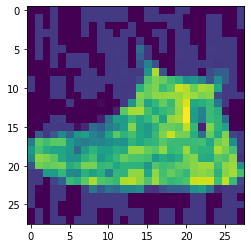

Prediction: dress Truth: trouser


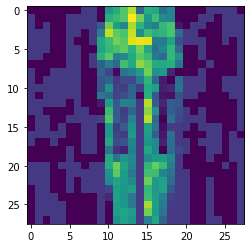

Prediction: sneaker Truth: sandal


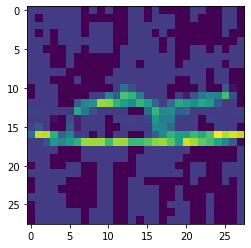

Prediction: sneaker Truth: sandal


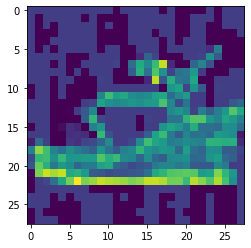

Prediction: top Truth: shirt


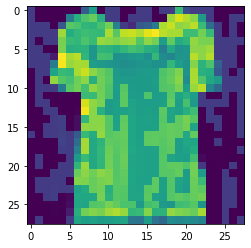

Prediction: dress Truth: trouser


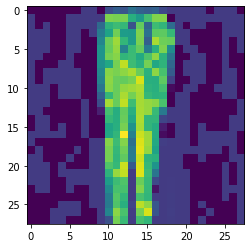

Prediction: dress Truth: bag


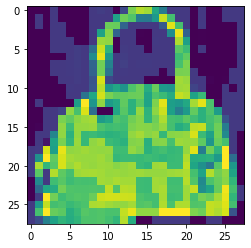

Prediction: top Truth: dress


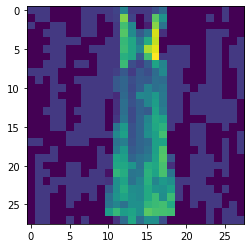

Prediction: sneaker Truth: sandal


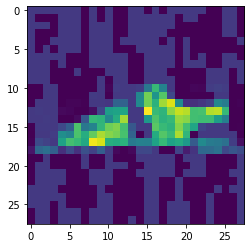

Prediction: shirt Truth: pullover


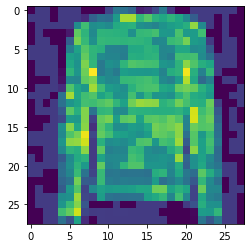

In [20]:
for adversarial, correct_label in zip(adversarial_image_array[10000:10010], adverserial_label_array[10000:10010]):
  print('Prediction:', labels[new_model.predict(adversarial.reshape((1, 28, 28, 1))).argmax()], 'Truth:', labels[correct_label])

  plt.imshow(adversarial.reshape(28, 28))
  #plt.imshow(adversarial)
  plt.show()

# Adverserial Training

In [25]:
# splitting the adversarial test and train data
x_adversarial_train, y_adversarial_train = adversarial_image_array[1:50000], adverserial_label_array[1:50000]
x_adversarial_test, y_adversarial_test = adversarial_image_array[50001:60000], adverserial_label_array[50001:60000]

In [27]:
ad_train_data = tf.data.Dataset.from_tensor_slices(
    (x_adversarial_train.reshape([-1, 28, 28, 1]).astype(np.float32) / 255, y_adversarial_train.astype(np.int32)))
ad_train_data = ad_train_data.shuffle(buffer_size=60000).batch(128)

ad_test_images = x_adversarial_test.reshape([-1, 28, 28, 1]).astype(np.float32) / 255
ad_test_labels = y_adversarial_test.astype(np.int32)

In [28]:
def adverserial_training_Testing_loop(epochs, model,optimizer):
  loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
  train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
  test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
  for epoch in range(epochs):
    print("Starting epoch", epoch+1)
    for step, (image_batch, label_batch) in enumerate(ad_train_data):
      with tf.GradientTape() as tape:
         logits = model(image_batch)
         loss = loss_fn(label_batch, logits)
      #Calculate gradients using gradient tape
      gradients = tape.gradient(loss, model.trainable_variables)
      #Assign new variables to the model using optimizer isntead of sub assign
      optimizer.apply_gradients(zip(gradients, model.trainable_variables))
      #Calculate  traning accuracy
      train_acc_metric(label_batch, logits)
    
      if not step % 100:
        #Calculate test accuracy
        test_acc_metric(ad_test_labels, model(ad_test_images))   
        print("Loss: {} Training Accuracy: {} Testing Accuracy: {}".format(loss, train_acc_metric.result(), test_acc_metric.result()))

In [31]:
adverserial_training_Testing_loop(20, new_model, optimizer = tf.optimizers.SGD())

Starting epoch 1
Loss: 1.3189387321472168 Training Accuracy: 0.53125 Testing Accuracy: 0.5310531258583069
Loss: 1.2930023670196533 Training Accuracy: 0.5662901997566223 Testing Accuracy: 0.5662566423416138
Loss: 1.2074434757232666 Training Accuracy: 0.5805736780166626 Testing Accuracy: 0.5772577524185181
Loss: 1.154484510421753 Training Accuracy: 0.5839908719062805 Testing Accuracy: 0.5838583707809448
Starting epoch 2
Loss: 1.09201979637146 Training Accuracy: 0.5894827246665955 Testing Accuracy: 0.5921192169189453
Loss: 1.0890182256698608 Training Accuracy: 0.5932747721672058 Testing Accuracy: 0.5929759740829468
Loss: 1.1927894353866577 Training Accuracy: 0.5963923335075378 Testing Accuracy: 0.5977026224136353
Loss: 1.0861802101135254 Training Accuracy: 0.6006303429603577 Testing Accuracy: 0.6015726327896118
Starting epoch 3
Loss: 1.0900707244873047 Training Accuracy: 0.6042087078094482 Testing Accuracy: 0.6047271490097046
Loss: 1.1139278411865234 Training Accuracy: 0.6070789694786072 